# Preprocessing

Your chemical structure data may have some inconsistency in molecular graph notation that comes from difference in input data format. Also preferable molecular graph model should be selected according to the application.  `MolecularGraph.jl` offers preprocessing methods that helps unification of expression and making consistent molecular graph model as you like.

- Kekulization
- Implicit/Explicit hydrogen
- Dealing with stereochemistry
- Unifying representation of charges and delocalized electrons
- Extract largest molecular graph


In [1]:
import Pkg
Pkg.activate("..")
using MolecularGraph

Activating environment at `~/Workspace/MolecularGraph.jl_notebook/Project.toml`


## Kekulization

SMILES allows aromatic bond notation without specific bond order value. Although we know it is intrinsic expression of aromaticity, it is sometimes inconvenient in the case where we need appearent atom valence to calculate molecular properties.

`kekulize!` converts aromatic bonds into single/double bonds.

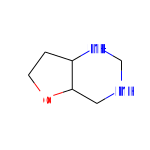

In [2]:
mol = smilestomol("o1ccc2c1cncn2")
molsvg = drawsvg(mol, 150, 150)
# Aromatic bond drawing (e.g. dashed double bond) is not supported yet
display("image/svg+xml",  molsvg)

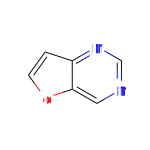

In [3]:
mol = smilestomol("o1ccc2c1cncn2")
kekulize!(mol)
molsvg = drawsvg(mol, 150, 150)
display("image/svg+xml",  molsvg)

## Implicit/explicit hydrogens

Molecules parsed from `SDFile` and `SMILES` may have some hydrogen atom nodes. Hydrogen nodes can be removed by `removehydrogens`.

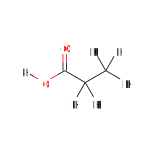

In [4]:
mol = smilestomol("[CH3][CH2]C(=O)[OH]")
molsvg = drawsvg(mol, 150, 150)
display("image/svg+xml",  molsvg)

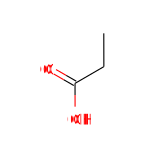

In [5]:
mol = removehydrogens(mol)
molsvg = drawsvg(mol, 150, 150)
display("image/svg+xml",  molsvg)

`removehydrogens(mol, all=true)` (default) will remove all hydrogen nodes whereas `all=false` will remove only trivial hydrogens (are attached to organic atoms, have no charges and are not involved in stereochemistry)

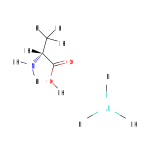

In [6]:
mol = smilestomol("O=C([OH])[C@H]([NH2])[CH3].[AlH3]")
molsvg = drawsvg(mol, 150, 150)
display("image/svg+xml",  molsvg)

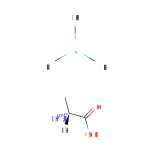

In [7]:
mol = removehydrogens(mol, all=false)
molsvg = drawsvg(mol, 150, 150)
display("image/svg+xml",  molsvg)

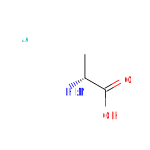

In [8]:
mol = removehydrogens(mol)  # all=true
molsvg = drawsvg(mol, 150, 150)
display("image/svg+xml",  molsvg)

## Dealing with stereochemistry

If you are working on stereochemistry,  apply following methods to the parsed molecule.

- Molecule from SMILES: `setdiastreo!`
- Molecule from SDFIle: `setstereocenter!` and `setdiastereo!`

Stereocenter information is stored in `Atom.stereo` by the following stereocenter notation rule similar to SMILES (looking from the lowest indexed atom, 2nd, 3rd, 4th atoms are in clockwise/anticlockwise order). The values are `:clockwise`, `:anticlockwise`, `unspecified` or `atypical`.

On the other hand, diastereomerism information is stored in `Bond.stereo` of double bonds. `:cis`, `:trans` or `:unspecified` will be set according cis/trans configuration of the lower indexed atoms at each side of the double bond.

If there is implicit hydrogens involved in stereochemistry, its index order priority is considered as same as the atom that the hydrogen is attached.

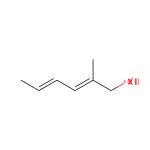

In [9]:
mol = smilestomol("C\\C(CO)=C/C=C/C")
setdiastereo!(mol)
molsvg = drawsvg(mol, 150, 150)
display("image/svg+xml",  molsvg)

Hydrogen nodes attached to the stereocenters can be removed by `removestereohydrogens` with keeping stereochemistry. Similary, explicit hydrogen nodes can be attached to the stereocenters by `addstereohydrogen`. As newly added hydrogen does not have coordinates information, `recalculatecoords=true` option is necessary for `drawsvg`.

Note that `removehydrogens` with `all=true` can affect stereochemistry of the molecule. Make sure to call `removestereohydrogens` before `removehydrogens` if you want to work on stereochemistry.

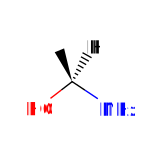

In [10]:
mol = sdftomol(split("""



  5  4  0  0  0  0  0  0  0  0999 V2000
   -4.1517    0.8937    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7055    1.6866    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -4.4194    1.5526    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.3812    0.3805    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -4.8022    0.3917    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  3  1  1  0  0  0
  1  2  1  6  0  0  0
  1  4  1  0  0  0  0
  1  5  1  0  0  0  0
M  END""", "\n"))
molsvg = drawsvg(mol, 150, 150)
display("image/svg+xml",  molsvg)

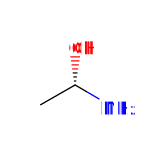

In [11]:
setstereocenter!(mol)
mol = removestereohydrogens(mol)
molsvg = drawsvg(mol, 150, 150, recalculatecoords=true)
display("image/svg+xml",  molsvg)

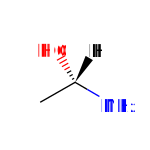

In [12]:
mol = addstereohydrogens(mol)
molsvg = drawsvg(mol, 150, 150, recalculatecoords=true)
display("image/svg+xml",  molsvg)

## Unifying representation of charges and delocalized electrons

Many oxoacids and oniums that are ionized in physiological condition have variations of charge state in actual chemical structure data (e.g free acid or salt). In practice, these molecules are often formatted to uncharged molecule for consistency. `neutralizeacids!` and `neutralizeoniums!` are convenient methods for this purpose.

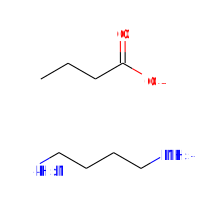

In [13]:
mol = smilestomol("CCCC(=O)[O-].[N+]CCCC[N+]")
molsvg = drawsvg(mol, 200, 200)
display("image/svg+xml",  molsvg)

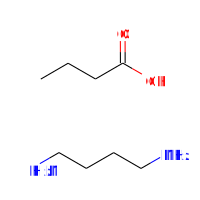

In [14]:
neutralizeacids!(mol)
neutralizeoniums!(mol)
Graph.clearcache!(mol)
molsvg = drawsvg(mol, 200, 200)
display("image/svg+xml",  molsvg)

Resonance structures that are often used to describe electron delocalization can be a cause of variation in molecular graph expression.　`depolarize!` and `toallenelike!` may work well for unification of the expression.

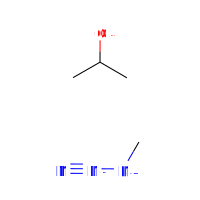

In [15]:
mol = smilestomol("C[C+]([O-])C.C[N-][N+]#N")
molsvg = drawsvg(mol, 200, 200)
display("image/svg+xml",  molsvg)

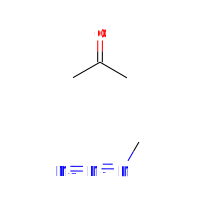

In [16]:
depolarize!(mol)
toallenelike!(mol)
Graph.clearcache!(mol)
molsvg = drawsvg(mol, 200, 200)
display("image/svg+xml",  molsvg)

## Extract largest molecular graph

Chemical structure `SDFIle` provided by reagent venders often have additives, water molecules and inorganic salts. In most cases, main component have the largest molecular graph, so `extractlargestcomponent` can be used to remove unnecessary components. (Note that this method should be carefully applied because there might be additives that have very large molecular graph. Functional group analysis will provide more meaningful desaltation and dehydration workflow)

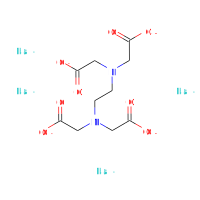

In [17]:
mol = smilestomol("[O-]C(=O)CN(CCN(CC([O-])=O)CC([O-])=O)CC([O-])=O.[Na+].[Na+].[Na+].[Na+]")
molsvg = drawsvg(mol, 200, 200)
display("image/svg+xml",  molsvg)

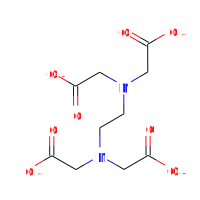

In [18]:
mol = extractlargestcomponent(mol)
molsvg = drawsvg(mol, 200, 200)
display("image/svg+xml",  molsvg)